In [46]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [3]:
housing= pd.read_csv('Melbourne_housing_FULL.csv')

In [4]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
housing['Postcode']= housing['Postcode'].astype('object')
housing['Propertycount']= housing['Propertycount'].astype('object')

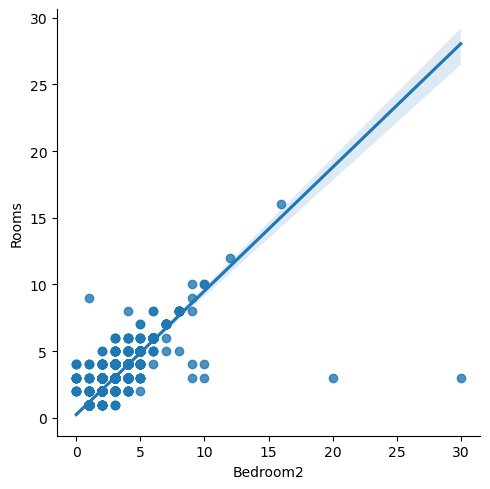

In [7]:
sns.lmplot(data= housing, x='Bedroom2', y='Rooms')

In [8]:
housing= housing.drop(['Bedroom2'], axis=1)

In [9]:
housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.000000,2.724700e+04,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


In [10]:
housing['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [11]:
housing.loc[housing.Bathroom>7].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125.0,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [12]:
#check building area 
housing.loc[housing.BuildingArea<1].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,1.0,1.0,215.0,0.00,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0
16540,South Melbourne,148 Cobden St,3,h,NaN,S,Marshall,24/06/2017,1.9,3205.0,2.0,0.0,282.0,0.01,1920.0,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943.0
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104.0,3.0,2.0,743.0,0.00,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083.0,1.0,2.0,542.0,0.00,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,3/09/2017,8.8,3081.0,1.0,2.0,658.0,0.00,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0


In [13]:
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

77

In [14]:
housing = housing[~(housing['BuildingArea'] < 1)]  
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

0

In [15]:
housing = housing.reset_index()

<Axes: ylabel='BuildingArea'>

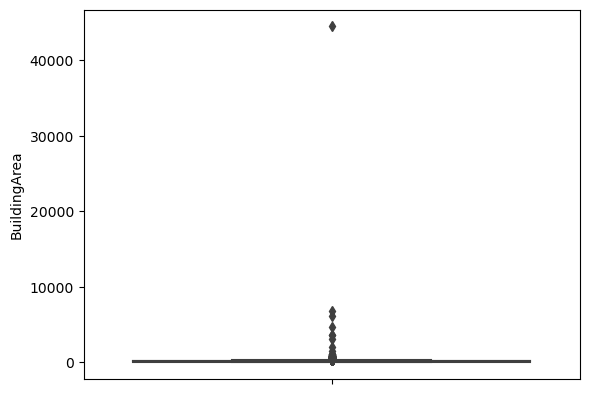

In [17]:
sns.boxplot(data = housing, y = 'BuildingArea')

In [18]:
housing.loc[housing.BuildingArea>40000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22614,22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,...,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0


In [19]:
housing['BuildingArea'].replace(44515.0, 445, inplace=True)

In [20]:
print(housing['YearBuilt'].loc[housing.YearBuilt>2018])
housing['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453     2106.0
32960    2019.0
Name: YearBuilt, dtype: float64


## Data Cleaning

In [21]:
housing.isnull().sum()

index                0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [22]:
priceWithMean = housing['Price'].fillna(housing['Price'].mean())
BAWithMean = housing['BuildingArea'].fillna(housing['BuildingArea'].mean())

priceMedian = housing['Price'].fillna(housing['Price'].median())
BAMedian = housing['BuildingArea'].fillna(housing['BuildingArea'].median())

In [23]:
missVIDsJoint = housing['Price'].isnull() | housing['BuildingArea'].isnull()

In [24]:
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}
colorCol = [colorChoiceDict[val] for val in missVIDsJoint]

Text(0, 0.5, 'Price')

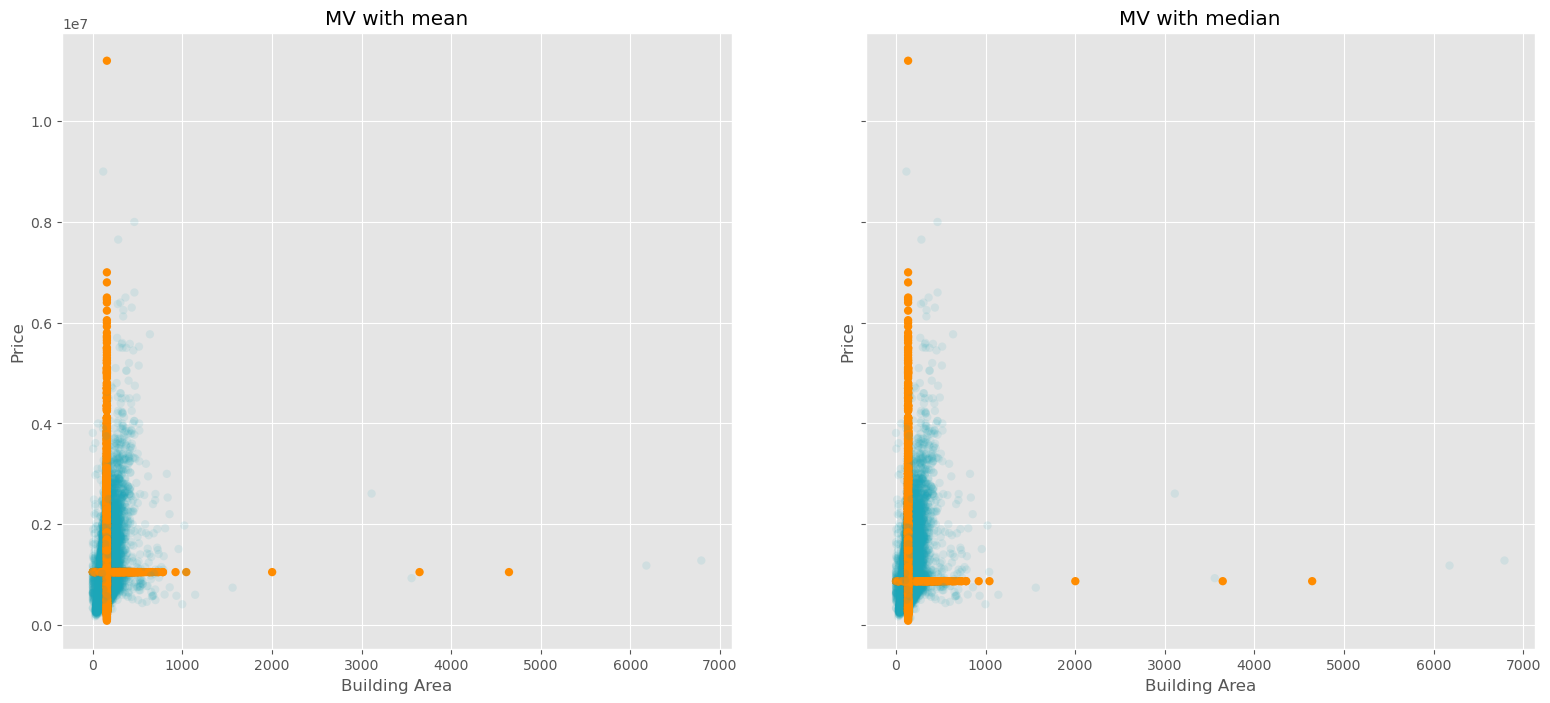

In [25]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(BAWithMean, priceWithMean, c = colorCol, linewidth=0)
ax1.set_title('MV with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price')
ax2.scatter(BAMedian, priceMedian, c = colorCol, linewidth=0)
ax2.set_title('MV with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price')

In [26]:
housing['Price']= housing['Price'].fillna(housing['Price'].median())
housing['Landsize']= housing['Landsize'].fillna(housing['Landsize'].median())
housing['Distance'] = housing['Distance'].fillna(housing['Distance'].median())
housing['BuildingArea']= housing['BuildingArea'].fillna(housing['BuildingArea'].median())
housing['Lattitude']= housing['Lattitude'].fillna(housing['Lattitude'].median())
housing['Longtitude']= housing['Longtitude'].fillna(housing['Longtitude'].median())
housing['YearBuilt']= housing['YearBuilt'].fillna(housing['YearBuilt'].median())
housing.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [27]:

housing['Bathroom']= housing['Bathroom'].fillna(housing['Bathroom'].mode()[0])
housing['Car']= housing['Car'].fillna(housing['Car'].mode()[0])
housing['CouncilArea']= housing['CouncilArea'].fillna(housing['CouncilArea'].mode()[0])
housing['Regionname']= housing['Regionname'].fillna(housing['Regionname'].mode()[0])
housing['Propertycount']= housing['Propertycount'].fillna(housing['Propertycount'].mode()[0])
housing['Postcode']= housing['Postcode'].fillna(housing['Postcode'].mode()[0])
housing.isnull().sum()

index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [29]:

housing['Bathroom'] = pd.to_numeric(housing['Bathroom']).round(0).astype(int)
housing['Car'] = pd.to_numeric(housing['Car']).round(0).astype(int)

In [30]:
housing["isOutlierPrice"] = 0 
housing["isOutlierDistance"] = 0

meanPrice = housing['Price'].mean()
stdDevPrice = housing['Price'].std()

meanDistance = housing['Distance'].mean()
stdDevDistance = housing['Distance'].std()

housing['isOutlierPrice'] = np.where(abs(housing['Price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
housing['isOutlierDistance'] = np.where(abs(housing['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [31]:

def percent(nom, denom):
    res= (nom*100)/denom
    print("%.3f%%" % round(res,3))


percent(housing["isOutlierPrice"].value_counts()[1], housing["isOutlierPrice"].value_counts()[0]) 

0.465%


In [32]:

percent(housing["isOutlierDistance"].value_counts()[1], housing["isOutlierDistance"].value_counts()[0])   

0.196%


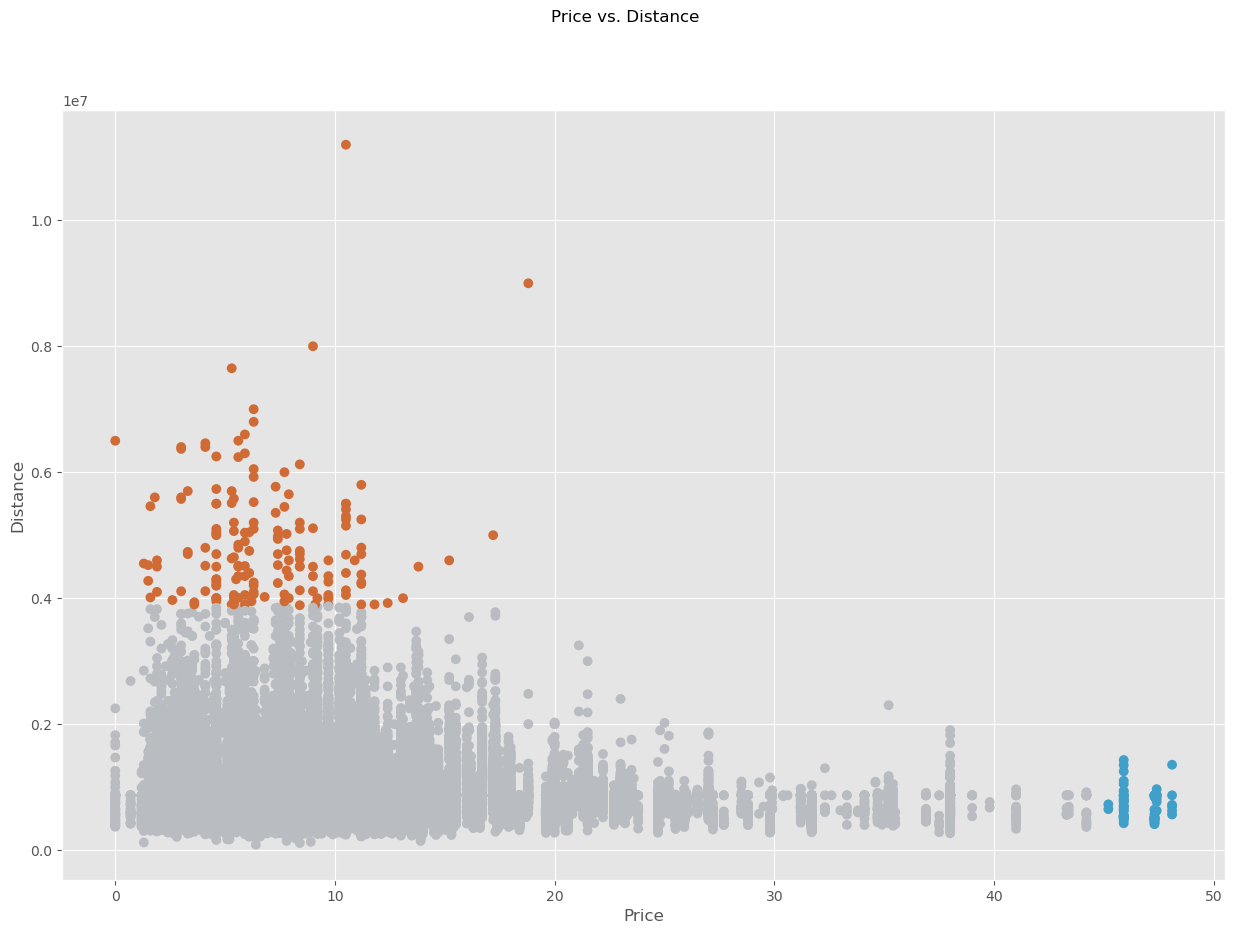

In [33]:

colorColumn = []

for i in range(len(housing)):
    if housing["isOutlierPrice"][i]== 1:
        colorColumn.append("#D06B36") # orange color
    elif housing["isOutlierDistance"][i] == 1:
        colorColumn.append("#40A0C9") # a blueish color
    else:
        colorColumn.append("#B9BCC0") # gray

plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.suptitle('Price vs. Distance')
plt.ylabel('Distance')
plt.scatter(housing.Distance, housing.Price , c = colorColumn, s = 50, linewidth=0)

In [35]:

housing.iloc[:,:19][housing.Price > 11000000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
25585,25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,10.5,3186.0,3,2,1400.0,136.0,1970.0,Bayside City Council,-37.89335,144.98643


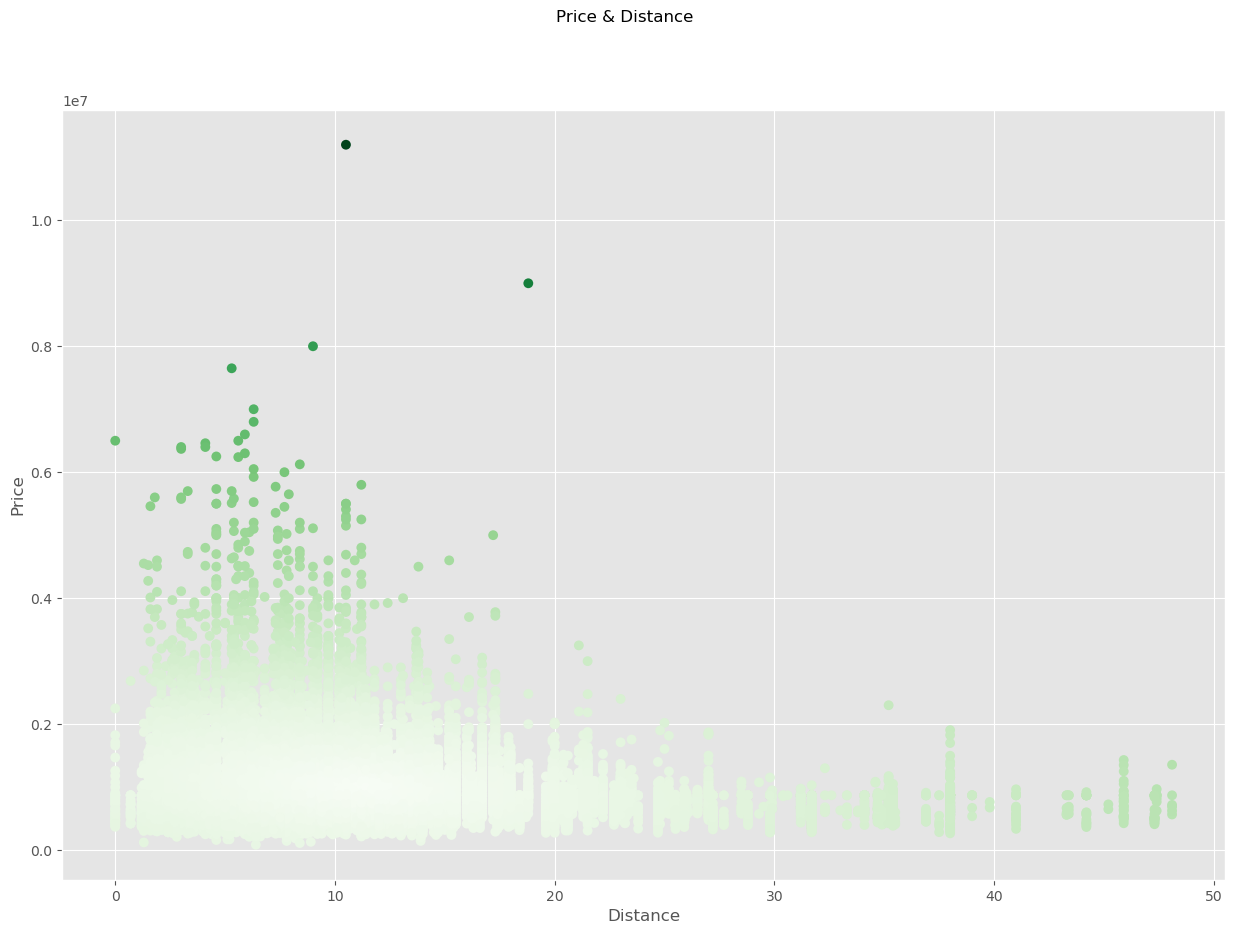

In [42]:

housing.dropna()
columnValues = housing[["Price", "Distance"]].values

meanVector = np.asarray([meanPrice, meanDistance]).reshape(1,2)

from scipy import spatial
mahalanobisDistances = spatial.distance.cdist(columnValues, meanVector, 'mahalanobis')[:,0]

plt.figure(figsize=(15,10))
plt.xlabel('Distance')
plt.suptitle('Price & Distance')
plt.ylabel('Price')
plt.scatter(housing.Distance, housing.Price , c = mahalanobisDistances, cmap = plt.cm.Greens, s = 50, linewidth=0)

In [43]:
housing['houseAge'] = 2018-housing['YearBuilt']

In [47]:

housing['data'] = pd.to_datetime(housing['Date'])

In [48]:

housing['doy'] = housing['data'].dt.dayofyear

housing['Year'] = housing['data'].dt.year


spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)


daje = []
for i in housing['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   


housing['season']= pd.Series(daje)

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              34780 non-null  int64         
 1   Suburb             34780 non-null  object        
 2   Address            34780 non-null  object        
 3   Rooms              34780 non-null  int64         
 4   Type               34780 non-null  object        
 5   Price              34780 non-null  float64       
 6   Method             34780 non-null  object        
 7   SellerG            34780 non-null  object        
 8   Date               34780 non-null  object        
 9   Distance           34780 non-null  float64       
 10  Postcode           34780 non-null  float64       
 11  Bathroom           34780 non-null  int64         
 12  Car                34780 non-null  int64         
 13  Landsize           34780 non-null  float64       
 14  Buildi

### Split

In [50]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.copy()

### Visualizations

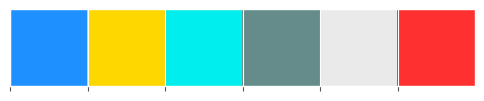

In [51]:
myPal = ["#1E90FF", "#FFD700", "#00EEEE", "#668B8B", "#EAEAEA", "#FF3030"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

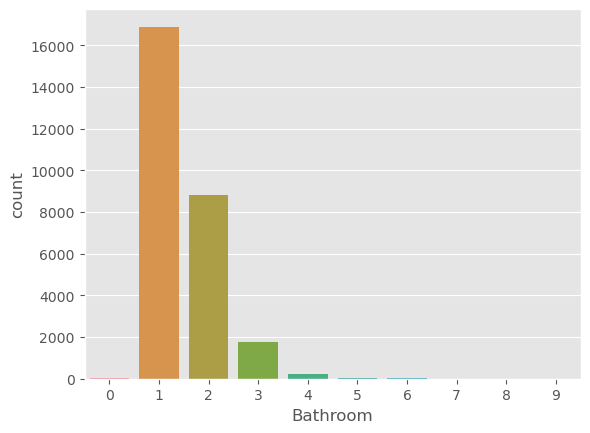

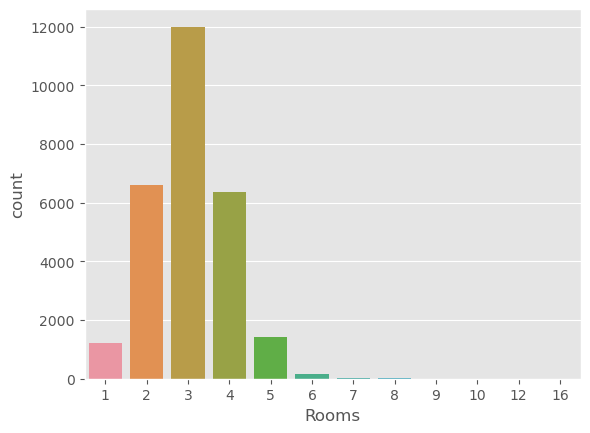

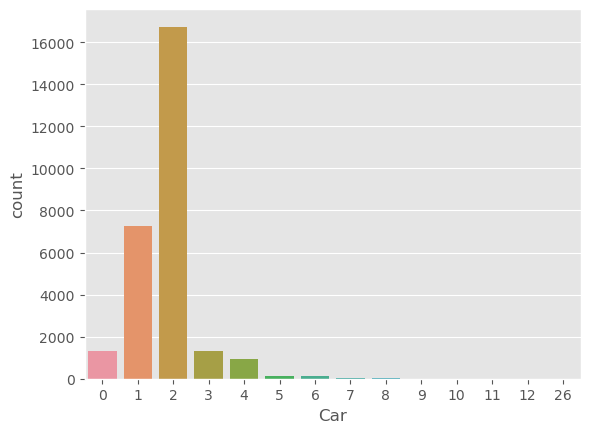

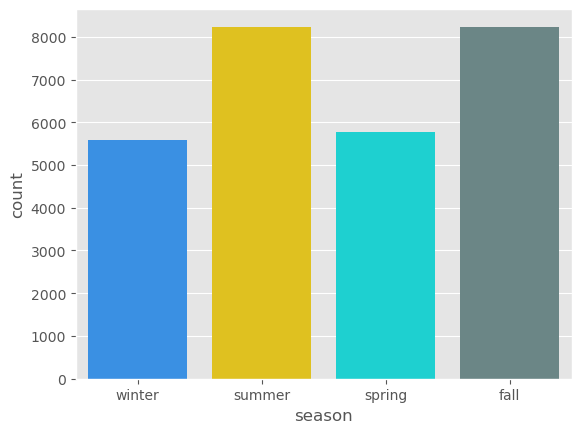

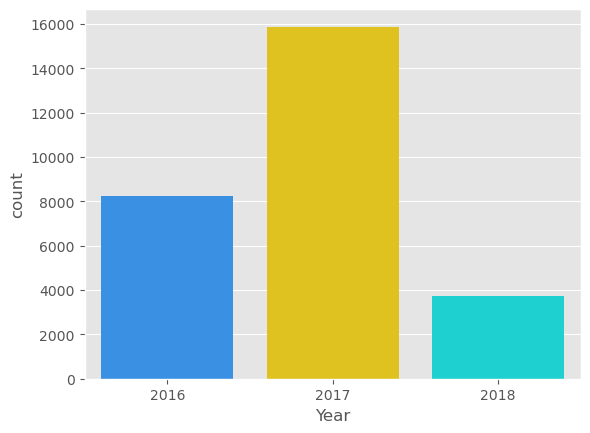

In [52]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=housing)

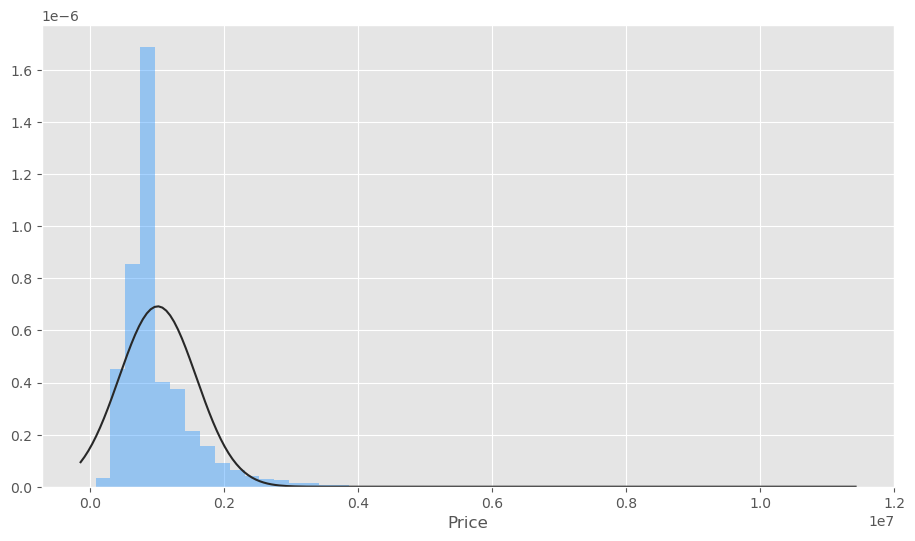

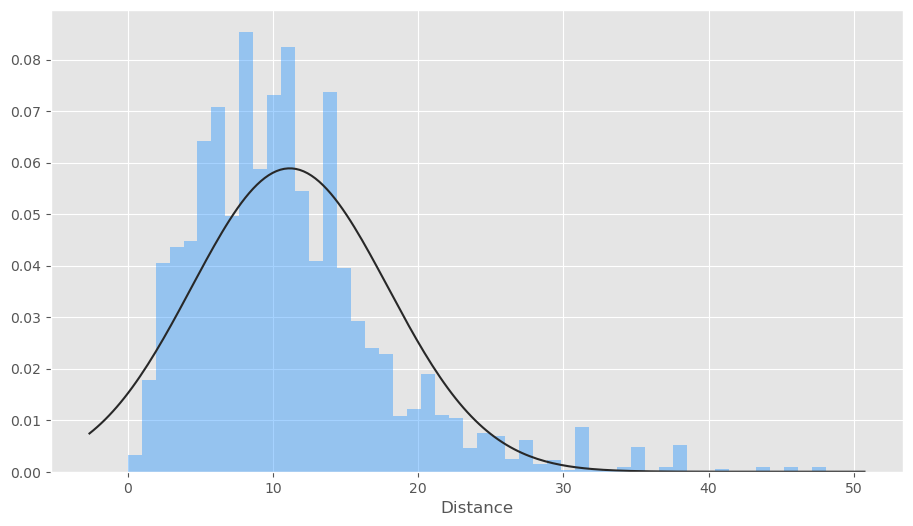

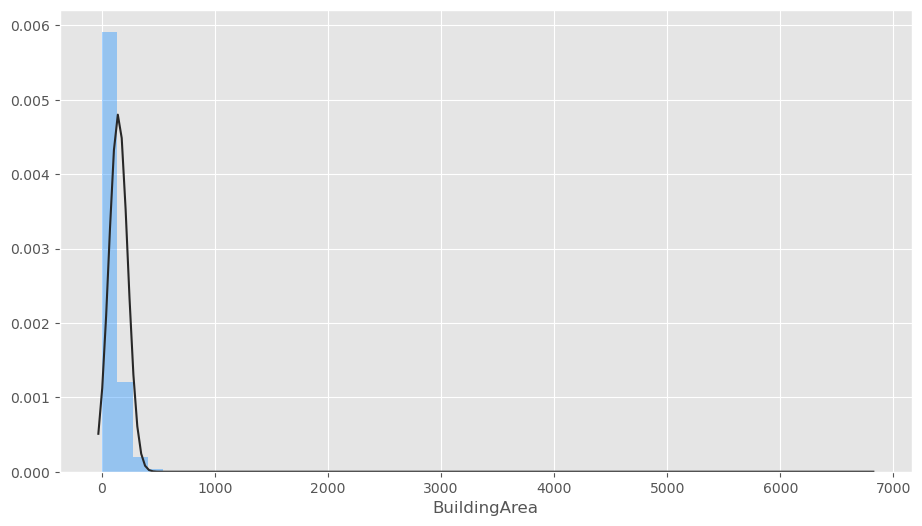

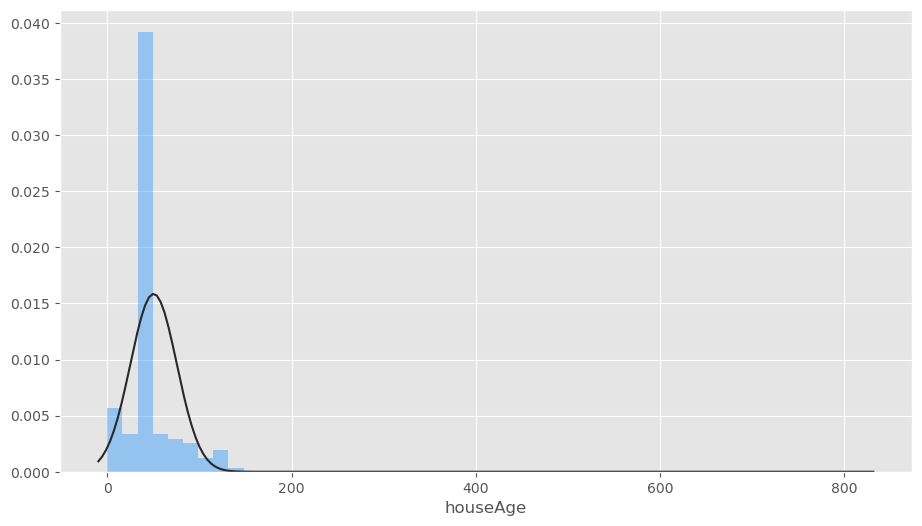

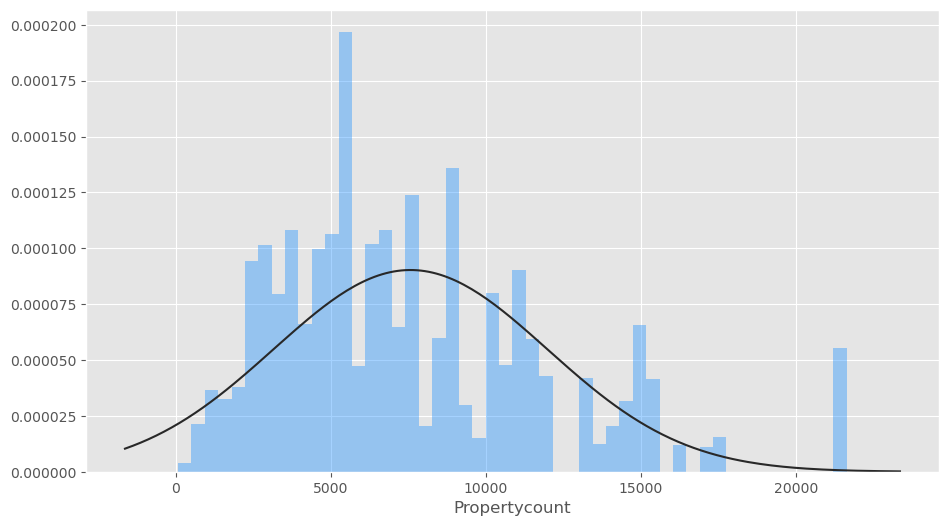

In [53]:
l= [housing['Price'], housing['Distance'], housing['BuildingArea'], housing['houseAge'], housing['Propertycount']]
for i in l:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

(0.0, 1000.0)

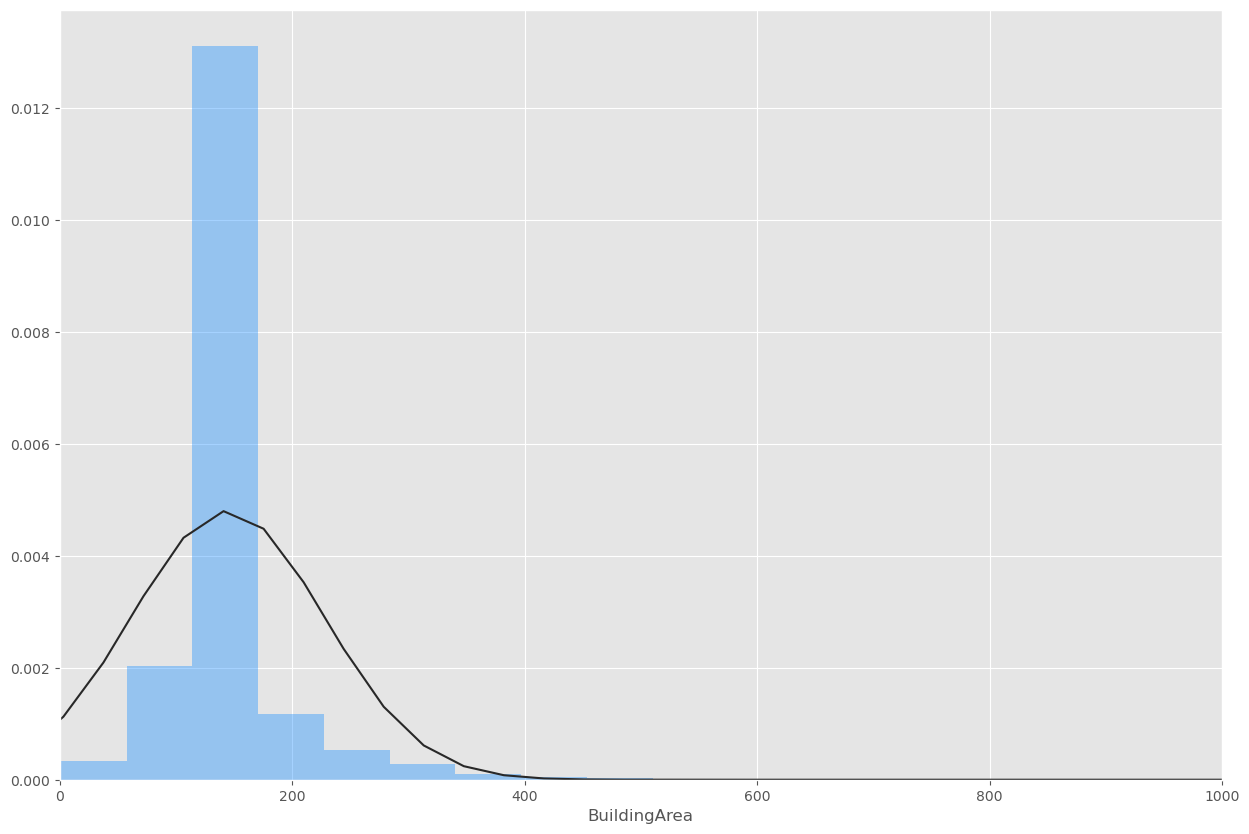

In [54]:
plt.figure(figsize=(15,10))
sns.distplot(housing['BuildingArea'], fit=norm, bins=120, kde=False)
plt.xlim(0,1000)

Text(0.5, 1.0, 'Rooms & Price')

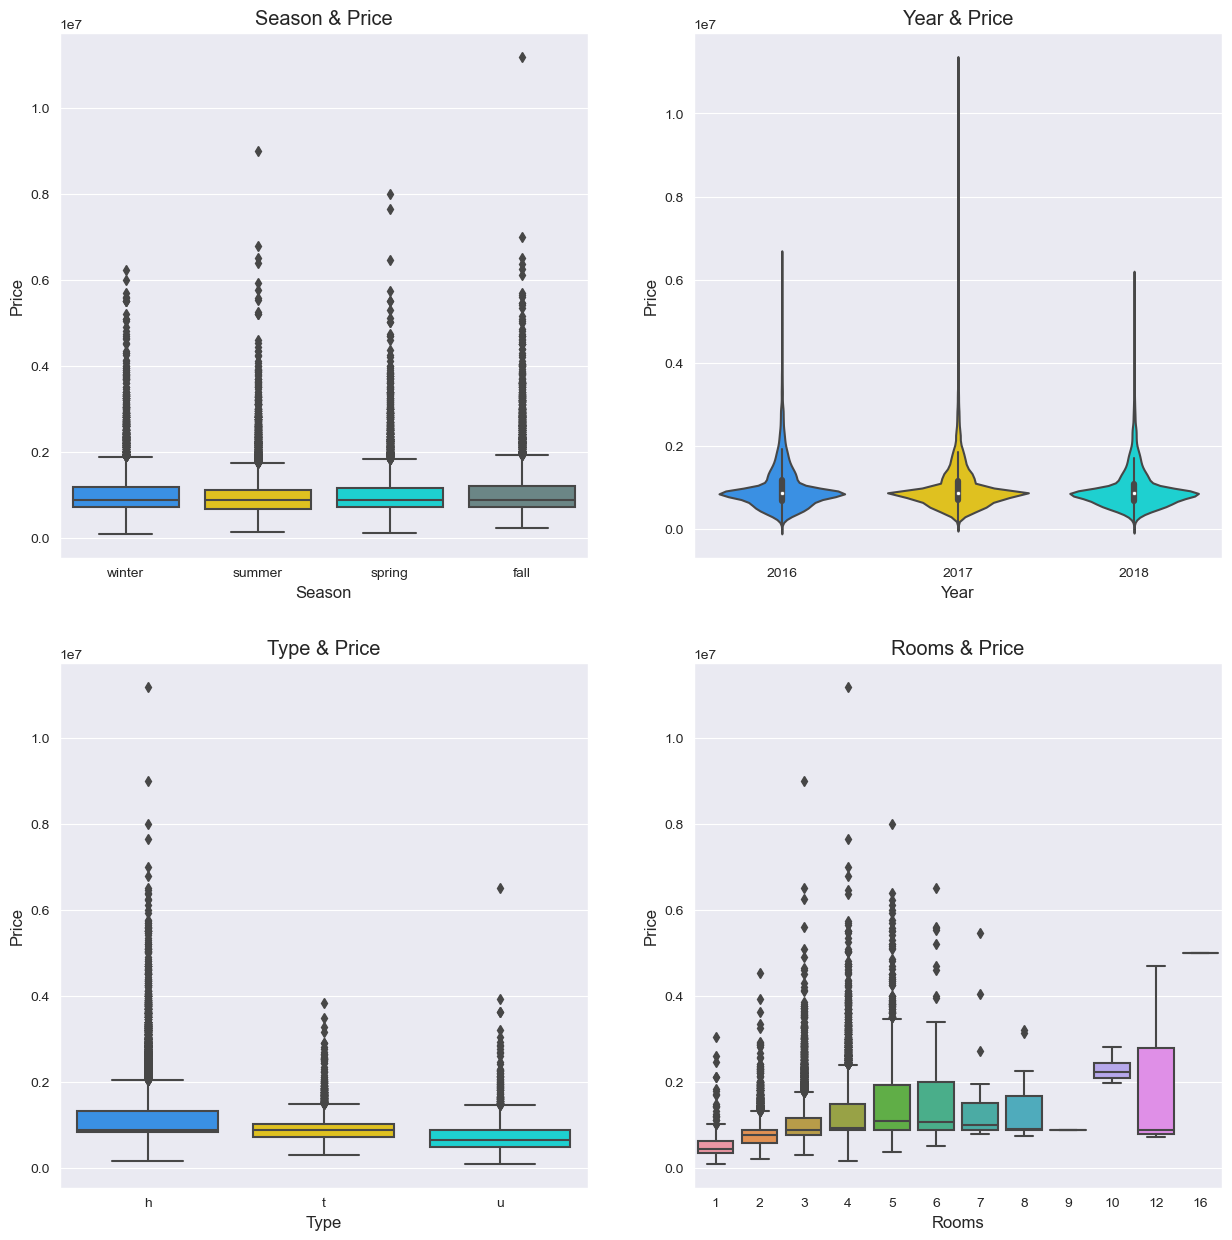

In [55]:

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = housing, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = housing, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = housing, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

In [56]:

housing.pivot_table('Price', index='data', aggfunc='sum').shape

(78, 1)

([<matplotlib.axis.XTick at 0x139ca7610>,
 [Text(0, 0, ''),
  Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

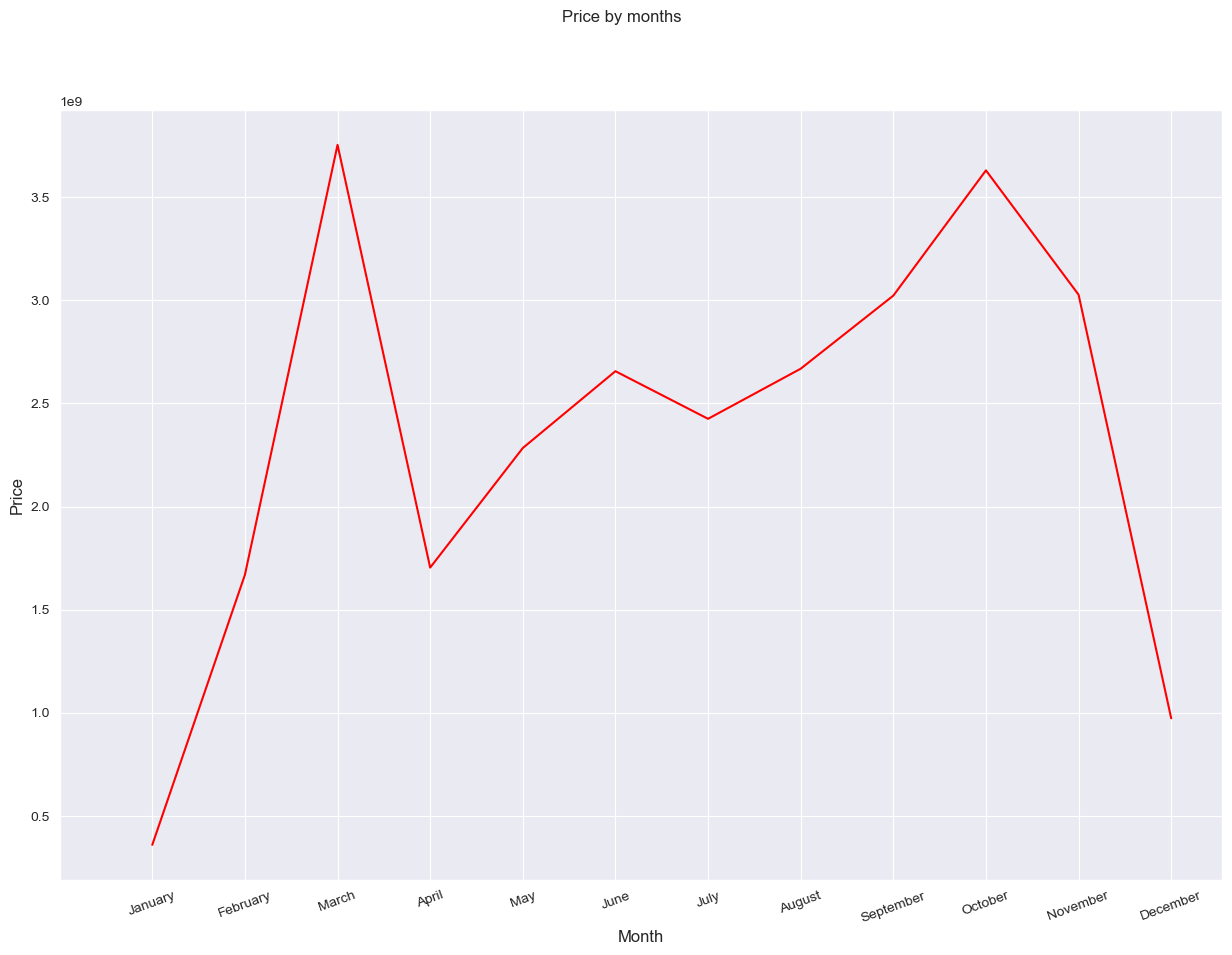

In [57]:
import calendar

housing['month'] = housing['data'].dt.month

by_month= housing.groupby('month')['Price'].sum()

plt.figure(figsize=(15,10))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price by months')
plt.ylabel('Price')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

[Text(552, 0, '2016-01'),
 Text(554, 0, '2016-03'),
 Text(555, 0, '2016-04'),
 Text(556, 0, '2016-05'),
 Text(557, 0, '2016-06'),
 Text(558, 0, '2016-07'),
 Text(559, 0, '2016-08'),
 Text(560, 0, '2016-09'),
 Text(561, 0, '2016-10'),
 Text(562, 0, '2016-11'),
 Text(563, 0, '2016-12'),
 Text(564, 0, '2017-01'),
 Text(565, 0, '2017-02'),
 Text(566, 0, '2017-03'),
 Text(567, 0, '2017-04'),
 Text(568, 0, '2017-05'),
 Text(569, 0, '2017-06'),
 Text(570, 0, '2017-07'),
 Text(571, 0, '2017-08'),
 Text(572, 0, '2017-09'),
 Text(573, 0, '2017-10'),
 Text(574, 0, '2017-11'),
 Text(575, 0, '2017-12'),
 Text(576, 0, '2018-01'),
 Text(577, 0, '2018-02'),
 Text(578, 0, '2018-03'),
 Text(581, 0, '2018-06'),
 Text(585, 0, '2018-10')]

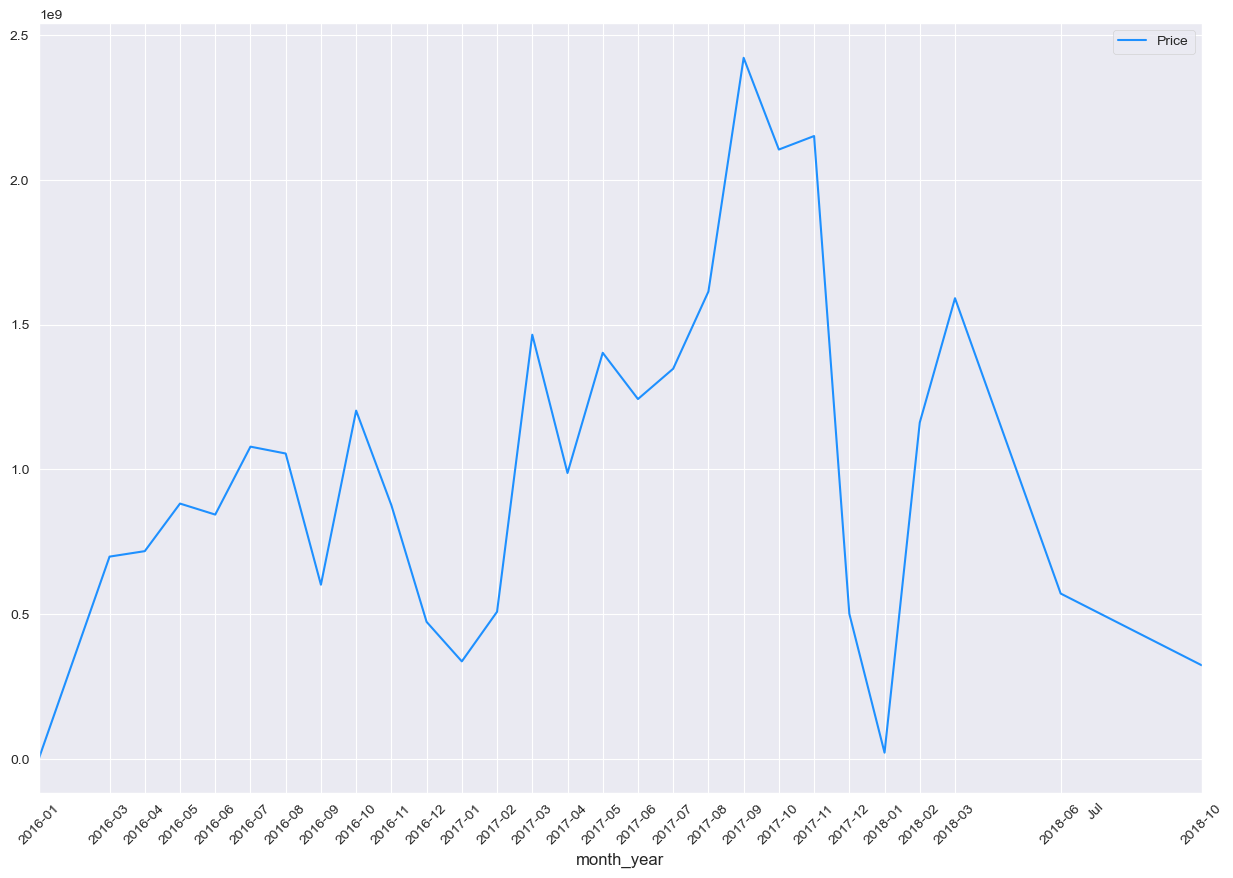

In [58]:

housing['month_year'] = housing['data'].dt.to_period('M')

by_year_month= pd.Series.to_frame(housing.groupby('month_year')['Price'].sum())

fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)

<Axes: >

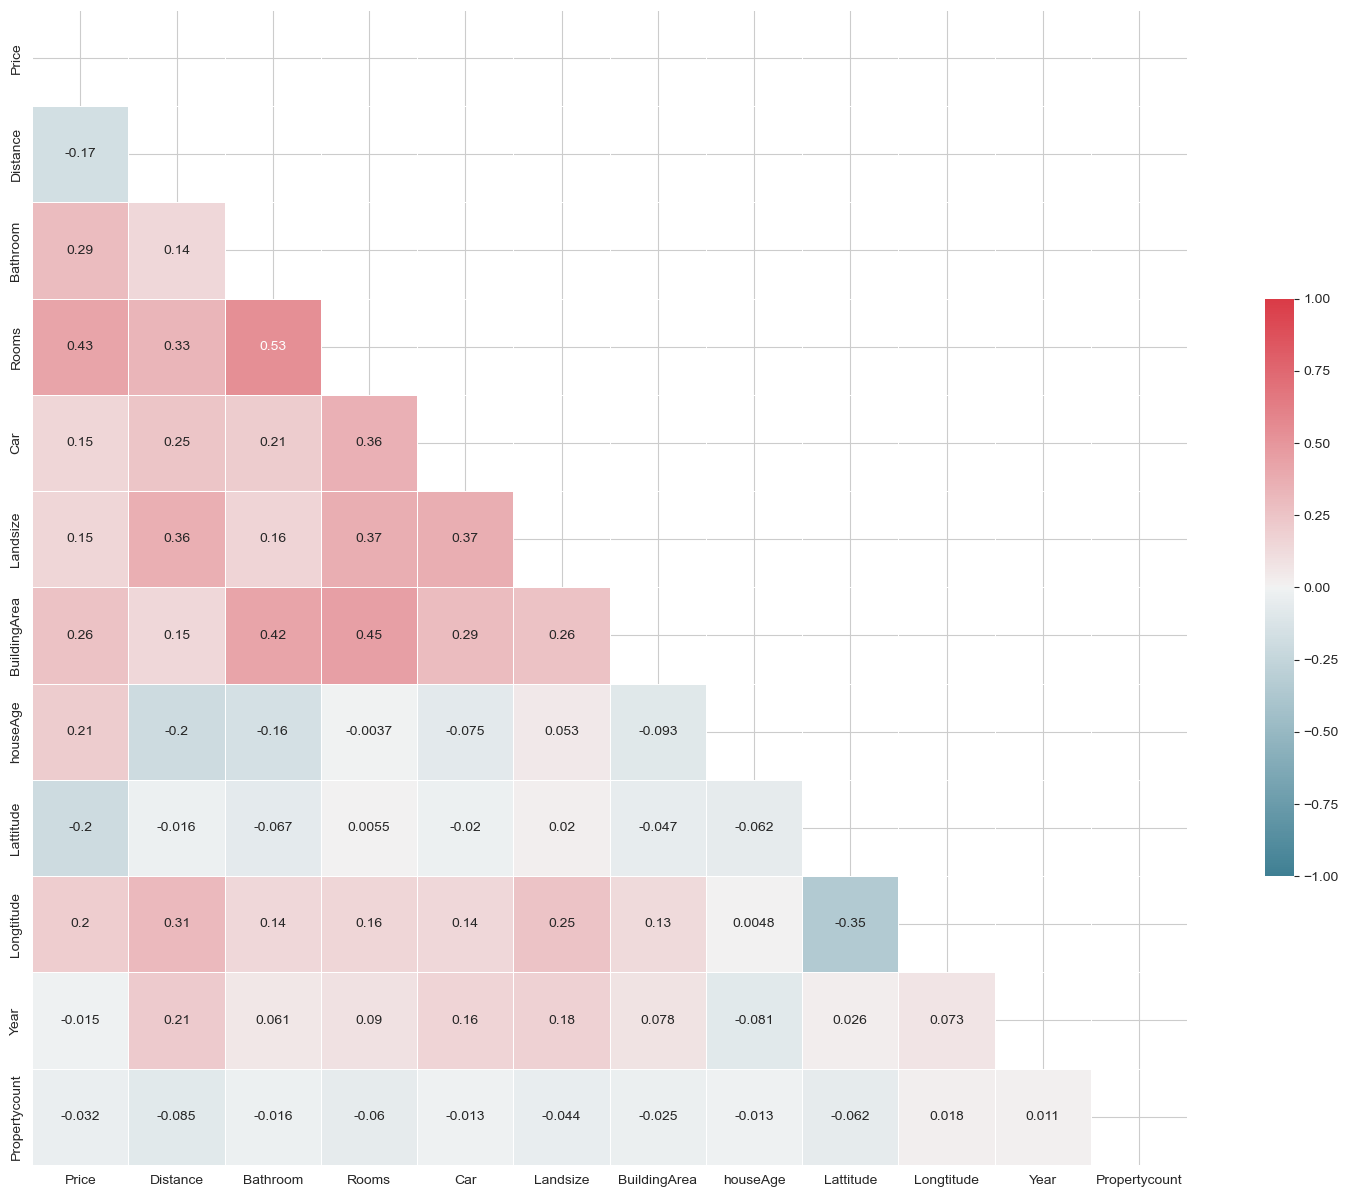

In [60]:

attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
h= housing[attributes]


sns.set_style('whitegrid')

corr_matrix=h.corr(method='spearman')
plt.figure(figsize=(20,15))


mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='Distance', ylabel='Price'>

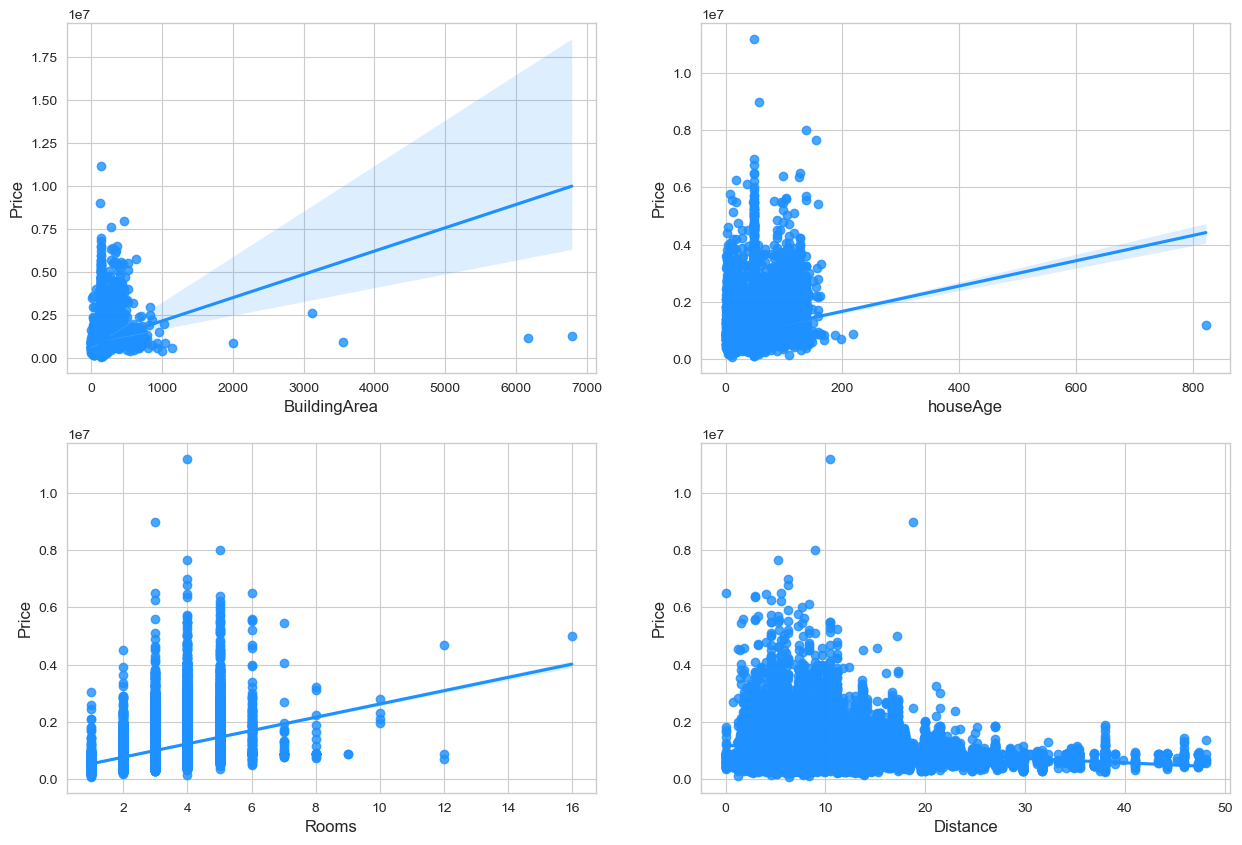

In [61]:

f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= housing, x='BuildingArea', y='Price')
plt.subplot(222)
sns.regplot(data= housing, x='houseAge', y='Price')
plt.subplot(223)
sns.regplot(data= housing, x='Rooms', y='Price')
plt.subplot(224)
sns.regplot(data= housing, x='Distance', y='Price')

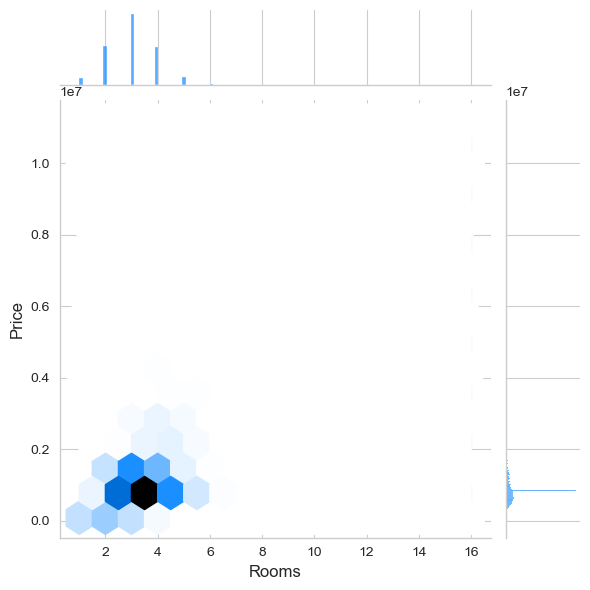

In [62]:
sns.jointplot(y='Price', x='Rooms', data=housing, kind='hex', gridsize=15)

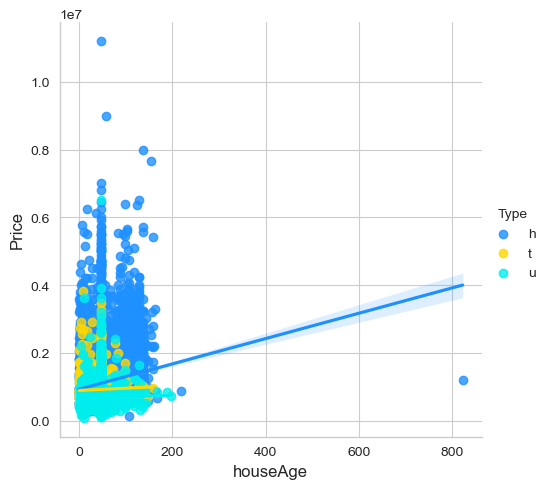

In [63]:
sns.lmplot(data= housing, x='houseAge', y= 'Price', hue= 'Type')

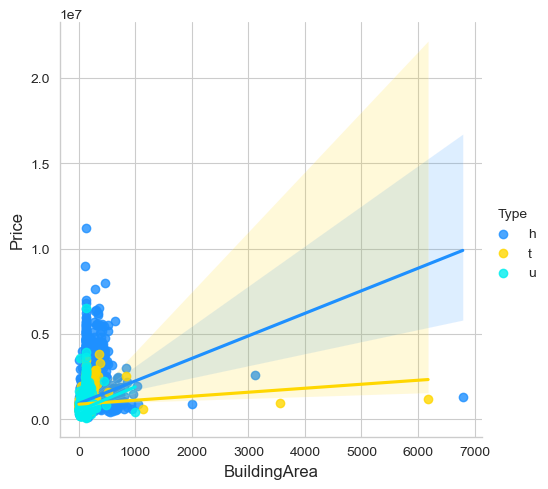

In [64]:
sns.lmplot(data= housing, x='BuildingArea', y= 'Price', hue='Type')

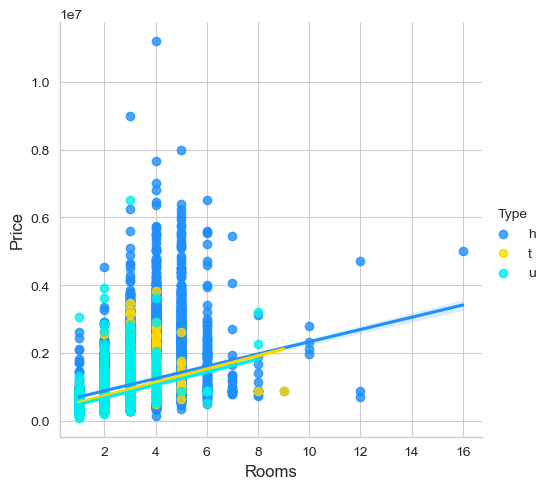

In [65]:
sns.lmplot(data= housing, x='Rooms', y= 'Price', hue='Type')

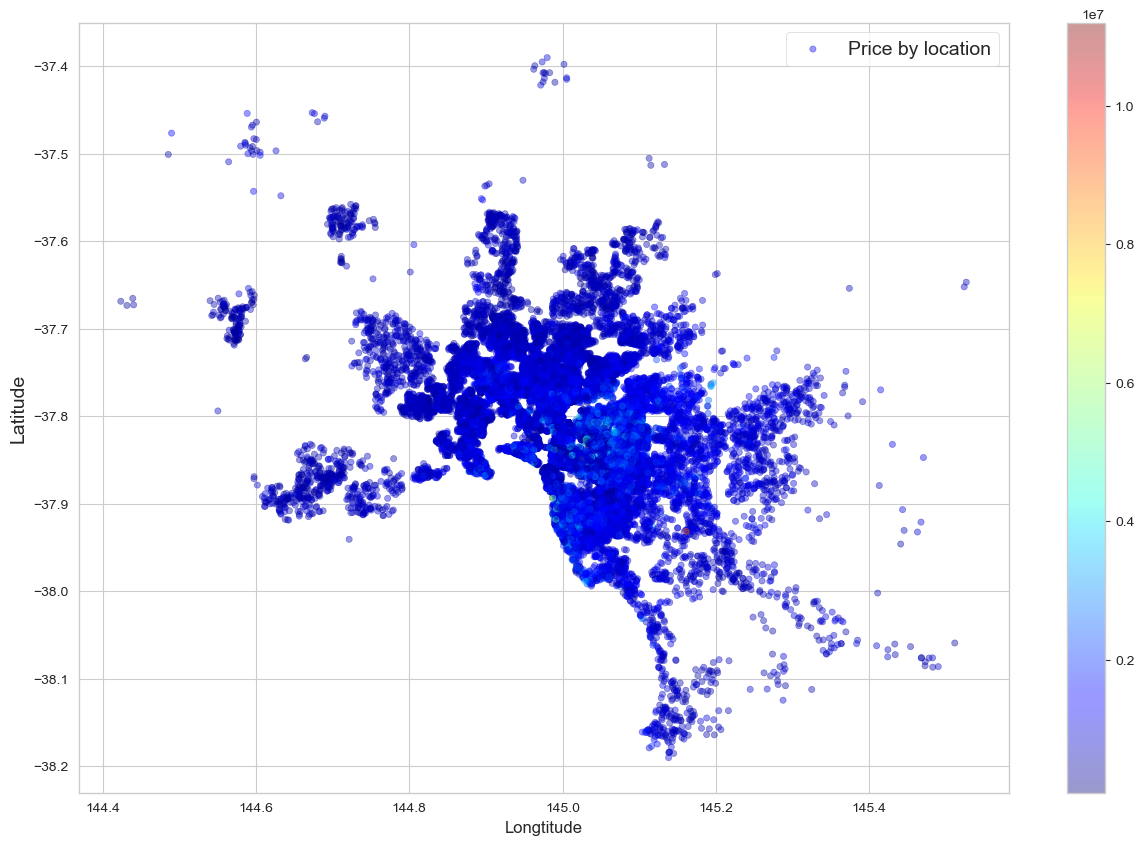

In [66]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

In [67]:
housing['Price_cut']= housing['Price'].loc[housing.Price<3500000]

Text(0.5, 1.0, 'AFTER CUT')

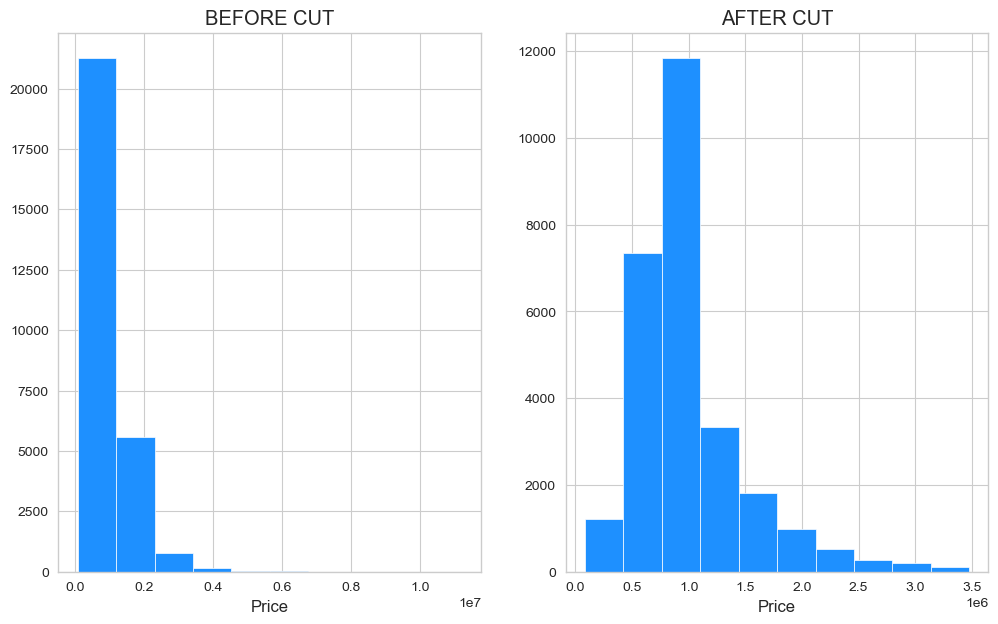

In [68]:
f, axes = plt.subplots(1,2, figsize = (12,7))

housing['Price'].hist(ax = axes[0])
axes[0].set_title('BEFORE CUT')
axes[0].set_xlabel('Price')

housing['Price_cut'].hist(ax = axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('AFTER CUT')

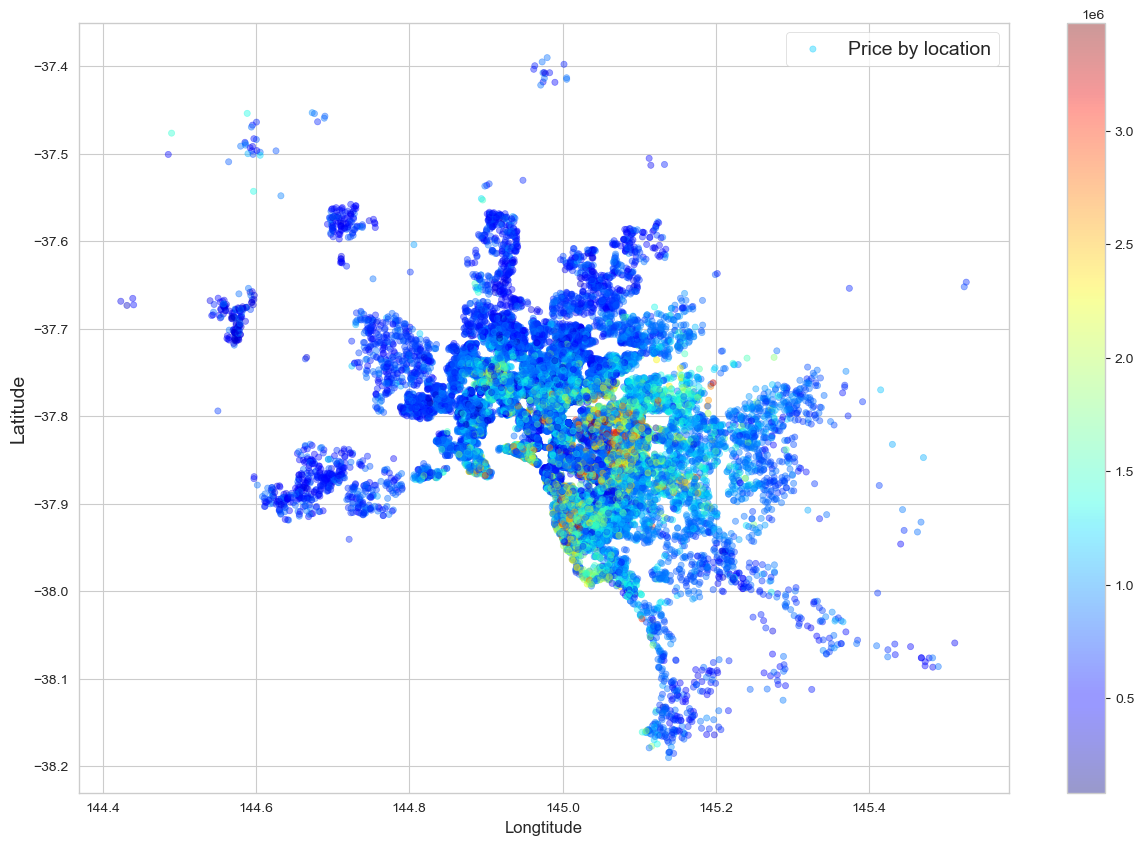

In [69]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price_cut, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

## ML

In [70]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27824 entries, 34585 to 15795
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              27824 non-null  int64         
 1   Suburb             27824 non-null  object        
 2   Address            27824 non-null  object        
 3   Rooms              27824 non-null  int64         
 4   Type               27824 non-null  object        
 5   Price              27824 non-null  float64       
 6   Method             27824 non-null  object        
 7   SellerG            27824 non-null  object        
 8   Date               27824 non-null  object        
 9   Distance           27824 non-null  float64       
 10  Postcode           27824 non-null  float64       
 11  Bathroom           27824 non-null  int64         
 12  Car                27824 non-null  int64         
 13  Landsize           27824 non-null  float64       
 14  Bu

In [71]:

hD= pd.get_dummies(housing, columns= ['Type', 'Regionname', 'season'])

hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'doy', 'month', 'month_year', 'Price_cut'], axis=1)

hD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27824 entries, 34585 to 15795
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  27824 non-null  int64  
 1   Rooms                                  27824 non-null  int64  
 2   Price                                  27824 non-null  float64
 3   Distance                               27824 non-null  float64
 4   Bathroom                               27824 non-null  int64  
 5   Car                                    27824 non-null  int64  
 6   Landsize                               27824 non-null  float64
 7   BuildingArea                           27824 non-null  float64
 8   Lattitude                              27824 non-null  float64
 9   Longtitude                             27824 non-null  float64
 10  Propertycount                          27824 non-null  float64
 11

### Feature Scaling

In [72]:

X = hD.drop("Price", axis=1)
Y = hD["Price"].copy()
scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [74]:

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [75]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 452721.13
RMSE of random forest = 158357.87
RMSE of decision tree = 0.00


In [76]:
for i, model in models:
    
    predictions = model.predict(x_train)
    
    errors = abs(predictions - y_train)
    
    mape = np.mean(100 * (errors / y_train))
   
    accuracy = 100 - mape    
   
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')
    

Accuracy of lin_reg= 70.94 %
Accuracy of random forest= 90.89 %
Accuracy of decision tree= 100.00 %


### ML Comparison 

In [77]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']


results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [78]:

results[8]

{'fit_time': array([0.160074  , 0.15650892, 0.1553309 , 0.15969825, 0.15724683,
        0.16811013, 0.15846086, 0.15428305, 0.17334199, 0.15458083]),
 'score_time': array([0.00107789, 0.00123429, 0.00108099, 0.00128484, 0.00172496,
        0.00131679, 0.00118804, 0.00107312, 0.00125885, 0.00096321]),
 'test_score': array([-0.02083634, -0.12833155, -0.00544366, -0.01168049, -0.00463494,
        -0.0582452 , -0.0851322 ,  0.08883934,  0.03251944, -0.03200505]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [79]:

LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()

LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

In [80]:

RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

In [81]:

DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [82]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,426282.246710,2.171109e+10,248367.014351,8675.013953,0.458884,0.030717
0,Linear Regression,454171.584294,2.179586e+10,286335.279085,8446.725637,0.383877,0.018110
2,Decision Trees,586276.817239,2.571128e+10,320229.514050,9538.151468,-0.022495,0.057136


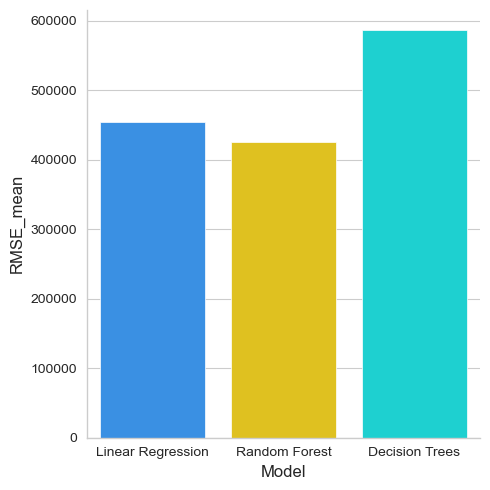

In [84]:
sns.catplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

### Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [86]:

cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

430409.50496800715 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
427619.320083354 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
429436.34549258946 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
422383.74359099875 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
434682.352532654 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
425812.02309237985 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
437229.8609693121 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
426432.9317567319 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
439640.0427488397 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
424505.4856104861 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
435562.059399909 {'bootstrap': True, 'max_depth': 

In [87]:

grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=25, n_jobs=-1)

In [89]:

grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
mape = np.mean(100 * (errors / y_train))
accuracy = 100 - mape    
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 77.39 %


In [90]:

grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 359617.58


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]

min_samples_split = [5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [92]:

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:

cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

nan {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
nan {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
416212.8147596842 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
nan {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
540193.6609065192 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
415247.0961205906 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
413470.0405979978 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
nan {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
540218.8750265082 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
414596.7680127213 {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}


In [94]:

rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [95]:

rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [96]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [97]:

random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)

mape = np.mean(100 * (errors / y_train))

accuracy = 100 - mape    

print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 86.24 %


In [98]:

final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 234361.92


In [99]:

importances = rf_random.best_estimator_.feature_importances_

feature_list = list(X.columns)


feature_importance= sorted(zip(importances, feature_list), reverse=True)

df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                                feature
0     0.110376                               Distance
1     0.092233                                  Rooms
2     0.083840                              Lattitude
3     0.082528                               Landsize
4     0.079704                             Longtitude
5     0.078191       Regionname_Southern Metropolitan
6     0.067160                                  index
7     0.065394                           BuildingArea
8     0.053567                          Propertycount
9     0.052252                               Bathroom
10    0.051117                                 Type_u
11    0.046852                               houseAge
12    0.038662                                 Type_h
13    0.024403                                    Car
14    0.011664                                   Year
15    0.011059        Regionname_Western Metropolitan
16    0.009159       Regionname_Northern Metropolitan
17    0.007496              

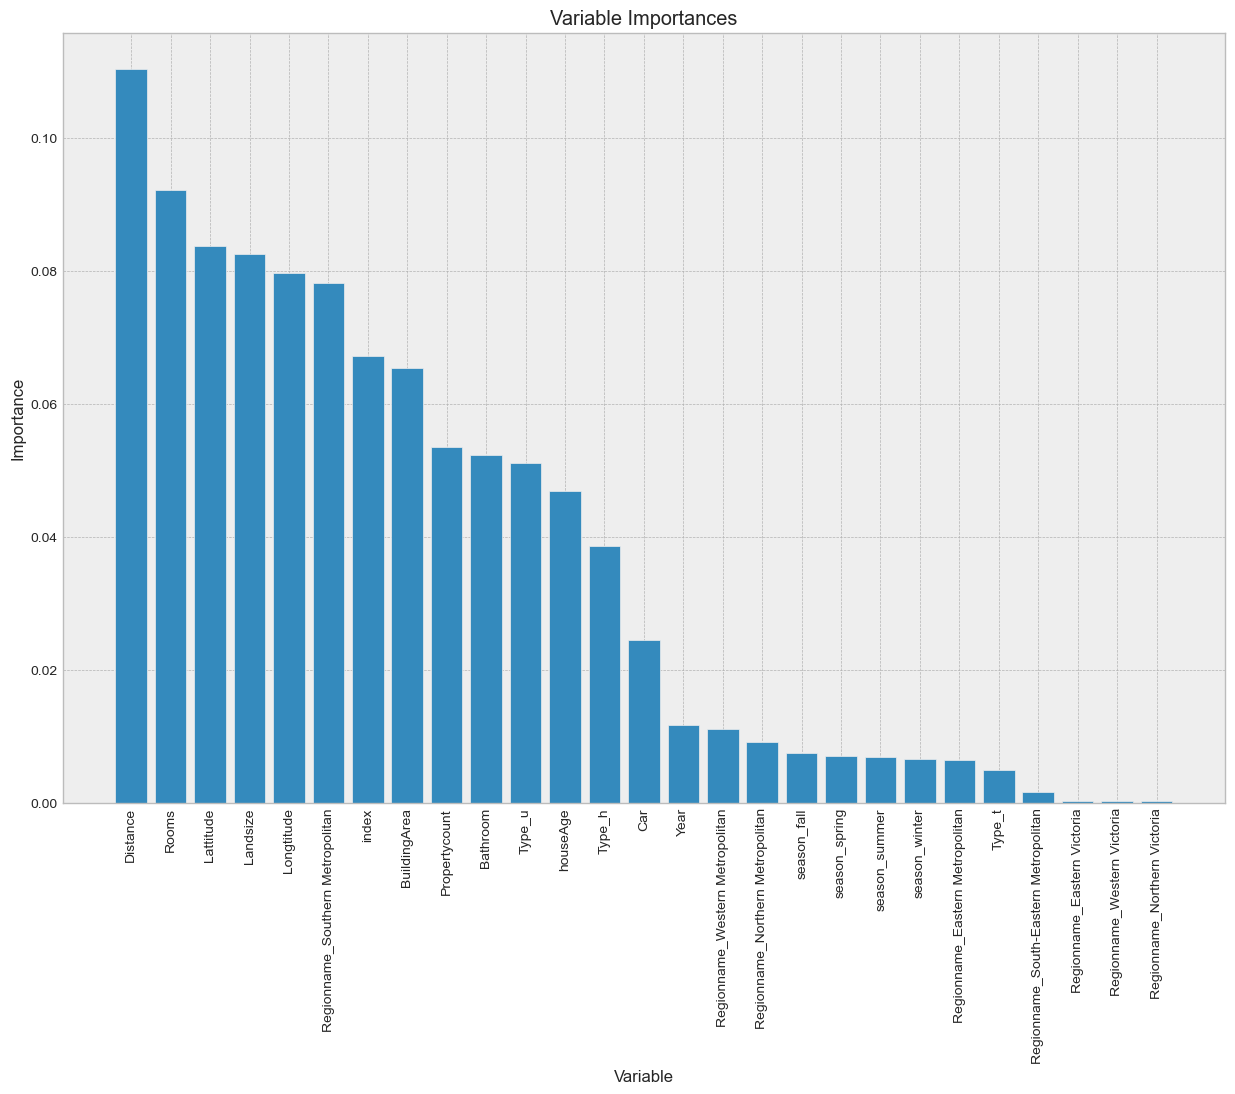

In [100]:

plt.style.use('bmh')

x_values = list(range(len(feature_importance)))


plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')

plt.xticks(x_values, feature, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [101]:
final_model = rf_random.best_estimator_

final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 405594.13


In [102]:

errors = abs(final_pred - y_test)

mape = np.mean(100 * (errors / y_test))

accuracy = 100 - mape    

print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 75.87 %


In [110]:
from sklearn.metrics import mean_absolute_error

max_depths = np.arange(1, 74)

train_errors = []
test_errors = []



In [111]:
for depth in max_depths:

    dt = RandomForestRegressor(max_depth=depth)
    dt.fit(x_train, y_train)    
    

    train_predictions = dt.predict(x_train)

    train_mae = mean_absolute_error(y_train, train_predictions)
    train_errors.append(train_mae)
    

    test_predictions = dt.predict(x_test)

    test_mae = mean_absolute_error(y_test, test_predictions)
    test_errors.append(test_mae)



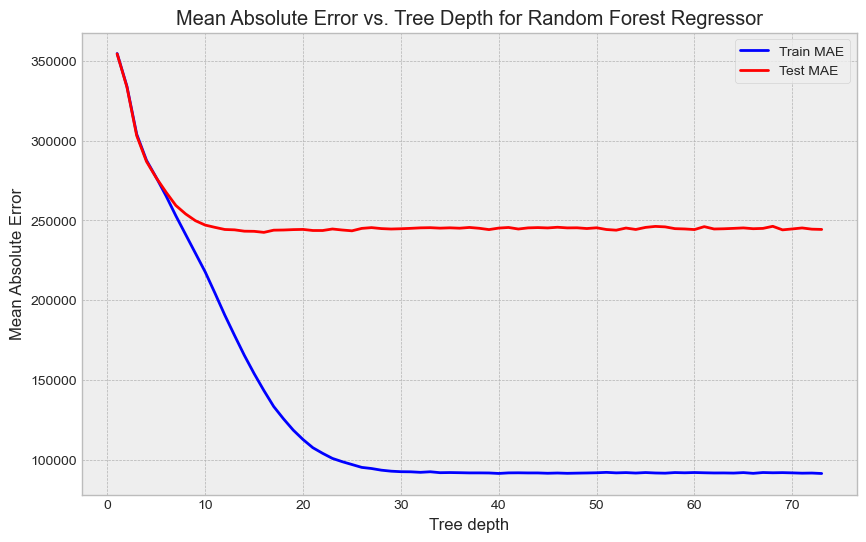

In [112]:

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, 'b', label='Train MAE')
plt.plot(max_depths, test_errors, 'r', label='Test MAE')
plt.xlabel('Tree depth')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. Tree Depth for Random Forest Regressor')
plt.legend()
plt.show()